<a href="https://colab.research.google.com/github/utpalmishra21/IBM-Applied-Data-Science-Capstone/blob/master/IBMDataScienceCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEB SCRAPING

###IMPORT Libraries

In [83]:
import requests
from tqdm import tqdm
from bs4 import BeautifulSoup

###GET Request

In [84]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
r = requests.get(url)
print("Request Status: ", r)

Request Status:  <Response [200]>


###PARSING

In [85]:
soup = BeautifulSoup(r.text, 'html.parser')
data = soup.find_all('table')[0]
#data

###TEXT EXTRACTION

In [86]:
PostalCode = []
Borough = []
Neighborhood = []

#data.find_all('tr')[0].find_all('th')[0].text.strip() #PostalCode
#data.find_all('tr')[0].find_all('th')[1].text.strip() #Borough
#data.find_all('tr')[0].find_all('th')[2].text.strip() #Neighborhood

for i in tqdm(range(1, len(data.find_all('tr')))):
  PostalCode.append(data.find_all('tr')[i].find_all('td')[0].text.strip())
  Borough.append(data.find_all('tr')[i].find_all('td')[1].text.strip())
  Neighborhood.append(data.find_all('tr')[i].find_all('td')[2].text.strip())

100%|██████████| 180/180 [00:00<00:00, 469.92it/s]


#DATAFRAME: Pre-Processing

In [87]:
import pandas as pd

data = pd.DataFrame({'Postal Code':PostalCode,
                     'Borough':Borough,
                     'Neighborhood': Neighborhood})#, index = PostalCode)

In [88]:
print(data.shape)
data.head()

(180, 3)


,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [89]:
data = data.sort_values(by = ['Postal Code'])
data.head()

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
9,M1B,Scarborough,"Malvern, Rouge"
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"
36,M1G,Scarborough,Woburn


###COURSERA Condition : Ignore cells with a borough that is Not assigned

In [90]:
data = data[data['Borough'] != 'Not assigned']
print(data.shape)
data.head()

(103, 3)


,Postal Code,Borough,Neighborhood
9,M1B,Scarborough,"Malvern, Rouge"
18,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
27,M1E,Scarborough,"Guildwood, Morningside, West Hill"
36,M1G,Scarborough,Woburn
45,M1H,Scarborough,Cedarbrae


###CO-ORDINATES CSV

In [91]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [92]:
path = '/content/drive/My Drive/Geospatial_Coordinates.csv'
coordinates = pd.read_csv(path)
coordinates = coordinates.sort_values(by = ['Postal Code'])
#coordinates.head()

In [93]:
data = pd.merge(data, coordinates, on="Postal Code")
data.head(10)

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


###DATA Description

In [94]:
data.to_csv('Toronto.csv')
!cp Toronto.csv "drive/My Drive/Coursera/IBM"

In [95]:
data.describe()

,Latitude,Longitude
count,103.000000,103.000000
mean,43.704608,-79.397153
std,0.052463,0.097146
min,43.602414,-79.615819
25%,43.660567,-79.464763
50%,43.696948,-79.388790
75%,43.745320,-79.340923
max,43.836125,-79.160497


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Postal Code   103 non-null    object 
 1   Borough       103 non-null    object 
 2   Neighborhood  103 non-null    object 
 3   Latitude      103 non-null    float64
 4   Longitude     103 non-null    float64
dtypes: float64(2), object(3)
memory usage: 4.8+ KB


###"NA" Value Check


In [97]:
data.isna().sum()

Postal Code     0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

###"NULL" Value Check

In [98]:
data.isnull().sum()

Postal Code     0
Borough         0
Neighborhood    0
Latitude        0
Longitude       0
dtype: int64

###Value Count of FEATURES

In [99]:
print(data['Postal Code'].value_counts(), "\n")
print(data['Borough'].value_counts(), "\n")
print(data['Neighborhood'].value_counts(), "\n")

M5E    1
M9B    1
M5X    1
M4S    1
M4Y    1
M3J    1
M4J    1
M6J    1
M6S    1
M6L    1
M3A    1
M2N    1
M4X    1
M7Y    1
M5V    1
M7R    1
M5N    1
M6A    1
M1S    1
M8Y    1
M9P    1
M5P    1
M4W    1
M4N    1
M2P    1
M3H    1
M1L    1
M1T    1
M1W    1
M1G    1
M4K    1
M9R    1
M4M    1
M1K    1
M8V    1
M3M    1
M6B    1
M8X    1
M1N    1
M4H    1
M9L    1
M6C    1
M4B    1
M1X    1
M4P    1
M9C    1
M3B    1
M4V    1
M4C    1
M5C    1
M6P    1
M8W    1
M1R    1
M4E    1
M5W    1
M1H    1
M5T    1
M5M    1
M2J    1
M6E    1
M3L    1
M5J    1
M1B    1
M3K    1
M6M    1
M2R    1
M1C    1
M6N    1
M2H    1
M5A    1
M4L    1
M6R    1
M4G    1
M9W    1
M5K    1
M2L    1
M5R    1
M1P    1
M7A    1
M6K    1
M6H    1
M9N    1
M4R    1
M5H    1
M1M    1
M8Z    1
M6G    1
M4A    1
M1V    1
M9M    1
M9A    1
M1E    1
M4T    1
M5S    1
M2M    1
M1J    1
M5G    1
M5L    1
M9V    1
M3N    1
M5B    1
M3C    1
M2K    1
Name: Postal Code, dtype: int64 

North York          24
Downtown Toronto

##Combining a row with the neighborhoods

In [100]:
X = data.drop(['Latitude',	'Longitude'], axis = 1)
X.shape

(103, 3)

In [101]:
X = X.groupby(by = 'Postal Code', as_index = False)
X.first()

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park"
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge"
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [102]:
print("DataFrame Shape: ", X.first().shape)

DataFrame Shape:  (103, 3)


In [103]:
data.groupby('Borough').count()

,Postal Code,Neighborhood,Latitude,Longitude
Borough,,,,
Central Toronto,9,9,9,9
Downtown Toronto,19,19,19,19
East Toronto,5,5,5,5
East York,5,5,5,5
Etobicoke,12,12,12,12
Mississauga,1,1,1,1
North York,24,24,24,24
Scarborough,17,17,17,17
West Toronto,6,6,6,6


###VISUALIZATION

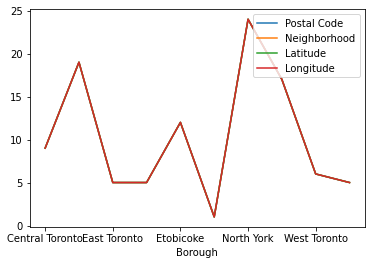

In [104]:
data.groupby('Borough').count().plot()

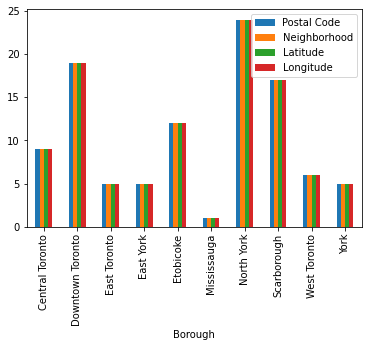

In [105]:
data.groupby('Borough').count().plot.bar()

###NEIGHBORHOODS

In [106]:
data.groupby('Neighborhood').count()

,Postal Code,Borough,Latitude,Longitude
Neighborhood,,,,
Agincourt,1,1,1,1
"Alderwood, Long Branch",1,1,1,1
"Bathurst Manor, Wilson Heights, Downsview North",1,1,1,1
Bayview Village,1,1,1,1
"Bedford Park, Lawrence Manor East",1,1,1,1
Berczy Park,1,1,1,1
"Birch Cliff, Cliffside West",1,1,1,1
"Brockton, Parkdale Village, Exhibition Place",1,1,1,1
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",1,1,1,1


In [107]:
print('There are {} uniques Neighborhood.'.format(len(data['Neighborhood'].unique())))
print('There are {} uniques Borough.'.format(len(data['Borough'].unique())))

There are 99 uniques Neighborhood.
There are 10 uniques Borough.


#Segmenting and Clustering Neighborhoods in TORONTO

> IMPORT LIBRARIES

In [108]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
#from pandas.io.json import json_normalize
from pandas import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

/bin/bash: conda: command not found
/bin/bash: conda: command not found
Folium installed
Libraries imported.


In [109]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [110]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
#from pandas.io.json import json_normalize
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [111]:
#!pip install pandas==1.0.3
#import pandas as pd

In [112]:
"""!wget -q -O 'toronto_data.json' https://cocl.us/toronto
print('Data downloaded!')

with open('toronto_data.json') as json_data:
    toronto_data = json.load(json_data)"""

"!wget -q -O 'toronto_data.json' https://cocl.us/toronto\nprint('Data downloaded!')\n\nwith open('toronto_data.json') as json_data:\n    toronto_data = json.load(json_data)"

> Quickly examine the resulting dataframe.

In [113]:
data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [114]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(len(data['Borough'].unique()), data.shape[0]))

The dataframe has 10 boroughs and 103 neighborhoods.


Use geopy library to get the latitude and longitude values of New York City.

> In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [115]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of TORONTO are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of TORONTO are 43.6534817, -79.3839347.


> Create a map of New York with neighborhoods superimposed on top.

In [116]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(data['Latitude'], data['Longitude'], data['Borough'], data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [117]:
data['Borough'].unique()

array(['Scarborough', 'North York', 'East York', 'East Toronto',
       'Central Toronto', 'Downtown Toronto', 'York', 'West Toronto',
       'Mississauga', 'Etobicoke'], dtype=object)

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

> However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Scarborough. So let's slice the original dataframe and create a new dataframe of the Scarborough data.

In [118]:
scarborough_data = data[data['Borough'] == 'Scarborough'].reset_index(drop=True)
scarborough_data.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


> Let's get the geographical coordinates of Manhattan.

In [119]:
address = 'Scarborough, Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Scarborough are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Scarborough are 43.773077, -79.257774.


> As we did with all of Toronto, let's visualizat Scarborough the neighborhoods in it.

In [120]:
# create map of Scarborough using latitude and longitude values
map_scarborough = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(scarborough_data['Latitude'], scarborough_data['Longitude'], scarborough_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_scarborough)  
    
map_scarborough

> Define Foursquare Credentials and Version

In [121]:
CLIENT_ID = 'TN3MGN2CMSKRHT3O0GGZI5KSTCTPSFEO53JEZ5HUYOSP2UZZ' # your Foursquare ID
CLIENT_SECRET = 'GMYIJ1VWWT3WKFEMSS4D4QVG0XPUYN3ONJVR0QHEAURYK0QK' # your Foursquare Secret
VERSION = '20180604'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TN3MGN2CMSKRHT3O0GGZI5KSTCTPSFEO53JEZ5HUYOSP2UZZ
CLIENT_SECRET:GMYIJ1VWWT3WKFEMSS4D4QVG0XPUYN3ONJVR0QHEAURYK0QK


Let's explore the first neighborhood in our dataframe.

> Get the neighborhood's name.

In [122]:
scarborough_data.loc[0, 'Neighborhood']

'Malvern, Rouge'

> Get the neighborhood's latitude and longitude values.

In [123]:
neighborhood_latitude = scarborough_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = scarborough_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = scarborough_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Malvern, Rouge are 43.806686299999996, -79.19435340000001.


Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

> First, let's create the GET request URL. Name your URL **url**.

In [124]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, neighborhood_latitude, neighborhood_longitude, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=TN3MGN2CMSKRHT3O0GGZI5KSTCTPSFEO53JEZ5HUYOSP2UZZ&client_secret=GMYIJ1VWWT3WKFEMSS4D4QVG0XPUYN3ONJVR0QHEAURYK0QK&v=20180604&ll=43.806686299999996,-79.19435340000001&radius=500&limit=100'

> Send the GET request and examine the results

In [125]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f35746750c0d25806e5002b'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-4bb6b9446edc76b0d771311c-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d16e941735',
         'name': 'Fast Food Restaurant',
         'pluralName': 'Fast Food Restaurants',
         'primary': True,
         'shortName': 'Fast Food'}],
       'id': '4bb6b9446edc76b0d771311c',
       'location': {'cc': 'CA',
        'city': 'Toronto',
        'country': 'Canada',
        'crossStreet': 'Morningside & Sheppard',
        'distance': 387,
        'formattedAddress': ['Toronto ON', 'Canada'],
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.80744841934756,
          'ln

> From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [126]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

> Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [127]:

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Wendy’s,Fast Food Restaurant,43.807448,-79.199056
1,Interprovincial Group,Print Shop,43.805630,-79.200378


> And how many venues were returned by Foursquare?

In [128]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

2 venues were returned by Foursquare.


## 2. Explore Neighborhoods in TORONTO

> Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [129]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

> Now write the code to run the above function on each neighborhood and create a new dataframe called *scarborough_venues*.

In [130]:
# type your answer here

scarborough_venues = getNearbyVenues(names = scarborough_data['Neighborhood'],
                                   latitudes = scarborough_data['Latitude'],
                                   longitudes = scarborough_data['Longitude'])

Malvern, Rouge
Rouge Hill, Port Union, Highland Creek
Guildwood, Morningside, West Hill
Woburn
Cedarbrae
Scarborough Village
Kennedy Park, Ionview, East Birchmount Park
Golden Mile, Clairlea, Oakridge
Cliffside, Cliffcrest, Scarborough Village West
Birch Cliff, Cliffside West
Dorset Park, Wexford Heights, Scarborough Town Centre
Wexford, Maryvale
Agincourt
Clarks Corners, Tam O'Shanter, Sullivan
Milliken, Agincourt North, Steeles East, L'Amoreaux East
Steeles West, L'Amoreaux West
Upper Rouge


> Let's check the size of the resulting dataframe

In [131]:
print(scarborough_venues.shape)
scarborough_venues.head()

(92, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Malvern, Rouge",43.806686,-79.194353,Interprovincial Group,43.805630,-79.200378,Print Shop
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Great Shine Window Cleaning,43.783145,-79.157431,Home Service
3,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank


> Let's check how many venues were returned for each neighborhood

In [132]:
scarborough_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,3,3,3,3,3,3
"Birch Cliff, Cliffside West",4,4,4,4,4,4
Cedarbrae,8,8,8,8,8,8
"Clarks Corners, Tam O'Shanter, Sullivan",14,14,14,14,14,14
"Cliffside, Cliffcrest, Scarborough Village West",2,2,2,2,2,2
"Dorset Park, Wexford Heights, Scarborough Town Centre",6,6,6,6,6,6
"Golden Mile, Clairlea, Oakridge",8,8,8,8,8,8
"Guildwood, Morningside, West Hill",9,9,9,9,9,9
"Kennedy Park, Ionview, East Birchmount Park",7,7,7,7,7,7


> Let's find out how many unique categories can be curated from all the returned venues

In [133]:
print('There are {} uniques categories.'.format(len(scarborough_venues['Venue Category'].unique())))

There are 58 uniques categories.


## 3. Analyze Each Neighborhood

In [134]:
# one hot encoding
scarborough_onehot = pd.get_dummies(scarborough_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
scarborough_onehot['Neighborhood'] = scarborough_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [scarborough_onehot.columns[-1]] + list(scarborough_onehot.columns[:-1])
scarborough_onehot = scarborough_onehot[fixed_columns]

scarborough_onehot.head()

,Neighborhood,American Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bubble Tea Shop,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Convenience Store,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Hakka Restaurant,Health & Beauty Service,Hobby Shop,Home Service,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Print Shop,Rental Car Location,Restaurant,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> And let's examine the new dataframe size.

In [135]:
scarborough_onehot.shape

(92, 59)

> Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [136]:
scarborough_grouped = scarborough_onehot.groupby('Neighborhood').mean().reset_index()
scarborough_grouped

,Neighborhood,American Restaurant,Athletics & Sports,Auto Garage,Bakery,Bank,Bar,Breakfast Spot,Bubble Tea Shop,Bus Line,Bus Station,Café,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,College Stadium,Convenience Store,Department Store,Discount Store,Electronics Store,Fast Food Restaurant,Fried Chicken Joint,Gas Station,General Entertainment,Grocery Store,Hakka Restaurant,Health & Beauty Service,Hobby Shop,Home Service,Ice Cream Shop,Indian Restaurant,Intersection,Italian Restaurant,Korean Restaurant,Latin American Restaurant,Light Rail Station,Lounge,Medical Center,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Motel,Moving Target,Noodle House,Park,Pet Store,Pharmacy,Pizza Place,Playground,Print Shop,Rental Car Location,Restaurant,Sandwich Place,Shopping Mall,Skating Rink,Smoke Shop,Soccer Field,Thai Restaurant,Vietnamese Restaurant
0,Agincourt,0.0,0.000,0.000000,0.000000,0.000000,0.0,0.333333,0.000000,0.000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000
1,"Birch Cliff, Cliffside West",0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.25,0.000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.000,0.000000,0.000000
2,Cedarbrae,0.0,0.125,0.000000,0.125000,0.125000,0.0,0.000000,0.000000,0.000,0.000000,0.00,0.125,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125000,0.00,0.000000,0.125,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.125000,0.000000
3,"Clarks Corners, Tam O'Shanter, Sullivan",0.0,0.000,0.000000,0.000000,0.071429,0.0,0.000000,0.000000,0.000,0.000000,0.00,0.000,0.071429,0.000000,0.00,0.071429,0.000000,0.000000,0.000000,0.071429,0.071429,0.071429,0.00,0.000000,0.000,0.0,0.000000,0.0,0.000,0.000000,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.071429,0.000,0.000000,0.142857,0.142857,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.071429,0.000000
4,"Cliffside, Cliffcrest, Scarborough Village West",0.5,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.0,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.5,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.000000
5,"Dorset Park, Wexford Heights, Scarborough Town...",0.0,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.000000,0.00,0.000,0.166667,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.0,0.000000,0.0,0.000,0.333333,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.000000,0.000000,0.000,0.166667,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.000000,0.166667
6,"Golden Mile, Clairlea, Oakridge",0.0,0.000,0.000000,0.250000,0.000000,0.0,0.000000,0.000000,0.125,0.000000,0.00,0.000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000,0.0,0.000000,0.0,0.125

> Let's confirm the new size

In [137]:
scarborough_grouped.shape

(16, 59)

> Let's print each neighborhood along with the top 5 most common venues

In [138]:
num_top_venues = 10

for hood in scarborough_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = scarborough_grouped[scarborough_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant  0.33
1                     Lounge  0.33
2             Breakfast Spot  0.33
3        American Restaurant  0.00
4                  Pet Store  0.00
5          Korean Restaurant  0.00
6         Light Rail Station  0.00
7             Medical Center  0.00
8              Metro Station  0.00
9         Mexican Restaurant  0.00


----Birch Cliff, Cliffside West----
                       venue  freq
0               Skating Rink  0.25
1      General Entertainment  0.25
2                       Café  0.25
3            College Stadium  0.25
4        American Restaurant  0.00
5                       Park  0.00
6  Latin American Restaurant  0.00
7         Light Rail Station  0.00
8                     Lounge  0.00
9             Medical Center  0.00


----Cedarbrae----
                  venue  freq
0  Caribbean Restaurant  0.12
1       Thai Restaurant  0.12
2                Bakery  0.12
3                  Bank  0.12
4   

Let's put that into a *pandas* dataframe

> First, let's write a function to sort the venues in descending order.

In [139]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [140]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = scarborough_grouped['Neighborhood']

for ind in np.arange(scarborough_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(scarborough_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Latin American Restaurant,Breakfast Spot,Lounge,Vietnamese Restaurant,Convenience Store,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station
1,"Birch Cliff, Cliffside West",College Stadium,Skating Rink,General Entertainment,Café,Vietnamese Restaurant,Health & Beauty Service,Hakka Restaurant,Grocery Store,Gas Station,Fried Chicken Joint
2,Cedarbrae,Fried Chicken Joint,Athletics & Sports,Bakery,Bank,Thai Restaurant,Hakka Restaurant,Caribbean Restaurant,Gas Station,Vietnamese Restaurant,Electronics Store
3,"Clarks Corners, Tam O'Shanter, Sullivan",Pharmacy,Pizza Place,Chinese Restaurant,Italian Restaurant,Noodle House,Fast Food Restaurant,Gas Station,Fried Chicken Joint,Intersection,Bank
4,"Cliffside, Cliffcrest, Scarborough Village West",American Restaurant,Motel,College Stadium,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant


## 4. Cluster Neighborhoods

> Run *k*-means to cluster the neighborhood into 5 clusters.

In [141]:
# set number of clusters
kclusters = 5

scarborough_grouped_clustering = scarborough_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(scarborough_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0], dtype=int32)

> Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [142]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

scarborough_merged = scarborough_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
scarborough_merged = scarborough_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

scarborough_merged.head() # check the last columns!

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.0,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Coffee Shop,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,4.0,Home Service,Bar,College Stadium,Hobby Shop,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Moving Target,Intersection,Medical Center,Electronics Store,Rental Car Location,Restaurant,Breakfast Spot,Bank,Mexican Restaurant,Gas Station
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3.0,Coffee Shop,Korean Restaurant,College Stadium,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Fried Chicken Joint,Athletics & Sports,Bakery,Bank,Thai Restaurant,Hakka Restaurant,Caribbean Restaurant,Gas Station,Vietnamese Restaurant,Electronics Store


In [152]:
scarborough_merged = scarborough_merged.drop(16)
#scarborough_merged

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0.0,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Coffee Shop,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,4.0,Home Service,Bar,College Stadium,Hobby Shop,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0.0,Moving Target,Intersection,Medical Center,Electronics Store,Rental Car Location,Restaurant,Breakfast Spot,Bank,Mexican Restaurant,Gas Station
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3.0,Coffee Shop,Korean Restaurant,College Stadium,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0.0,Fried Chicken Joint,Athletics & Sports,Bakery,Bank,Thai Restaurant,Hakka Restaurant,Caribbean Restaurant,Gas Station,Vietnamese Restaurant,Electronics Store
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476,1.0,Health & Beauty Service,Playground,Vietnamese Restaurant,Coffee Shop,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
6,M1K,Scarborough,"Kennedy Park, Ionview, East Birchmount Park",43.727929,-79.262029,0.0,Coffee Shop,Convenience Store,Hobby Shop,Bus Station,Discount Store,Chinese Restaurant,Department Store,Health & Beauty Service,Hakka Restaurant,Grocery Store
7,M1L,Scarborough,"Golden Mile, Clairlea, Oakridge",43.711112,-79.284577,0.0,Bakery,Ice Cream Shop,Bus Line,Soccer Field,Metro Station,Park,Intersection,Discount Store,Electronics Store,Fast Food Restaurant
8,M1M,Scarborough,"Cliffside, Cliffcrest, Scarborough Village West",43.716316,-79.239476,2.0,American Restaurant,Motel,College Stadium,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848,0.0,College Stadium,Skating Rink,General Entertainment,Café,Vietnamese Restaurant,Health & Beauty Service,Hakka Restaurant,Grocery Store,Gas Station,Fried Chicken Joint


In [154]:
scarborough_merged['Cluster Labels'] = scarborough_merged['Cluster Labels'].astype(int)
scarborough_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,0,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Coffee Shop,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,4,Home Service,Bar,College Stadium,Hobby Shop,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,0,Moving Target,Intersection,Medical Center,Electronics Store,Rental Car Location,Restaurant,Breakfast Spot,Bank,Mexican Restaurant,Gas Station
3,M1G,Scarborough,Woburn,43.770992,-79.216917,3,Coffee Shop,Korean Restaurant,College Stadium,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,0,Fried Chicken Joint,Athletics & Sports,Bakery,Bank,Thai Restaurant,Hakka Restaurant,Caribbean Restaurant,Gas Station,Vietnamese Restaurant,Electronics Store


> Finally, let's visualize the resulting clusters

In [155]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(scarborough_merged['Latitude'], scarborough_merged['Longitude'], scarborough_merged['Neighborhood'], scarborough_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

> Cluster 1

In [156]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 0, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Scarborough,0,Fast Food Restaurant,Print Shop,Vietnamese Restaurant,Coffee Shop,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint
2,Scarborough,0,Moving Target,Intersection,Medical Center,Electronics Store,Rental Car Location,Restaurant,Breakfast Spot,Bank,Mexican Restaurant,Gas Station
4,Scarborough,0,Fried Chicken Joint,Athletics & Sports,Bakery,Bank,Thai Restaurant,Hakka Restaurant,Caribbean Restaurant,Gas Station,Vietnamese Restaurant,Electronics Store
6,Scarborough,0,Coffee Shop,Convenience Store,Hobby Shop,Bus Station,Discount Store,Chinese Restaurant,Department Store,Health & Beauty Service,Hakka Restaurant,Grocery Store
7,Scarborough,0,Bakery,Ice Cream Shop,Bus Line,Soccer Field,Metro Station,Park,Intersection,Discount Store,Electronics Store,Fast Food Restaurant
9,Scarborough,0,College Stadium,Skating Rink,General Entertainment,Café,Vietnamese Restaurant,Health & Beauty Service,Hakka Restaurant,Grocery Store,Gas Station,Fried Chicken Joint
10,Scarborough,0,Indian Restaurant,Vietnamese Restaurant,Light Rail Station,Pet Store,Chinese Restaurant,College Stadium,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station
11,Scarborough,0,Middle Eastern Restaurant,Smoke Shop,Auto Garage,Shopping Mall,Sandwich Place,Bakery,Breakfast Spot,Fast Food Restaurant,Convenience Store,Department Store
12,Scarborough,0,Latin American Restaurant,Breakfast Spot,Lounge,Vietnamese Restaurant,Convenience Store,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station
13,Scarborough,0,Pharmacy,Pizza Place,Chinese Restaurant,Italian Restaurant,Noodle House,Fast Food Restaurant,Gas Station,Fried Chicken Joint,Intersection,Bank


> Cluster 2

In [157]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 1, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Scarborough,1,Health & Beauty Service,Playground,Vietnamese Restaurant,Coffee Shop,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
14,Scarborough,1,Playground,Park,Vietnamese Restaurant,Coffee Shop,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint


> Cluster 3

In [158]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 2, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Scarborough,2,American Restaurant,Motel,College Stadium,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant


> Cluster 4

In [159]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 2, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Scarborough,2,American Restaurant,Motel,College Stadium,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant


> Cluster 5

In [160]:
scarborough_merged.loc[scarborough_merged['Cluster Labels'] == 2, scarborough_merged.columns[[1] + list(range(5, scarborough_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Scarborough,2,American Restaurant,Motel,College Stadium,Health & Beauty Service,Hakka Restaurant,Grocery Store,General Entertainment,Gas Station,Fried Chicken Joint,Fast Food Restaurant
